# Problem 1

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y) ** 2

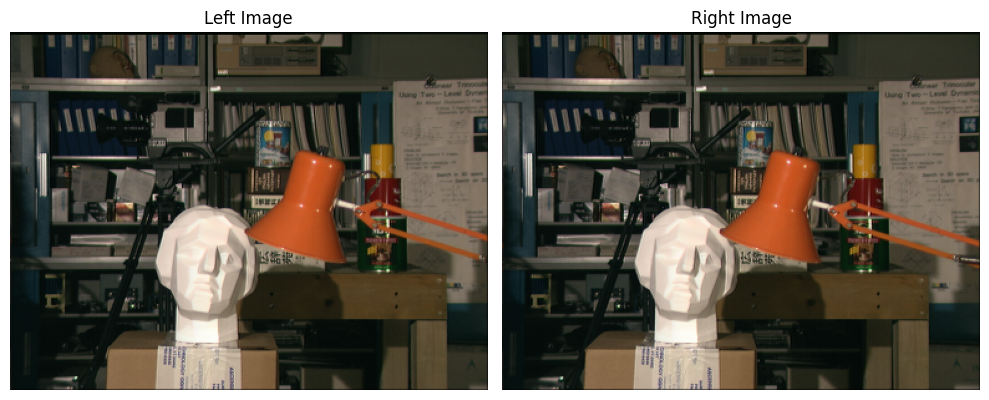

In [9]:
# Paths to the images
left_img_path = 'tsukuba/left.png'
right_img_path = 'tsukuba/right.png'

# Read the images
left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

# Proceed only if images were loaded correctly
if left is not None and right is not None:
    # Convert BGR to RGB format for Matplotlib
    left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

    # Create subplots to display images
    plt.figure(figsize=(10, 5))

    # Display the left image
    plt.subplot(1, 2, 1)
    plt.imshow(left)
    plt.title('Left Image')
    plt.axis('off')  # Hide axes

    # Display the right image
    plt.subplot(1, 2, 2)
    plt.imshow(right)
    plt.title('Right Image')
    plt.axis('off')  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()

In [10]:
def pixel_wise_matching_l1(left_img, right_img, disparity_range, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 \
                                else l1_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l1.png', depth)
        cv2.imwrite(f'pixel_wise_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth, cv2.applyColorMap(depth, cv2.COLORMAP_JET)

Saving result...
Done.


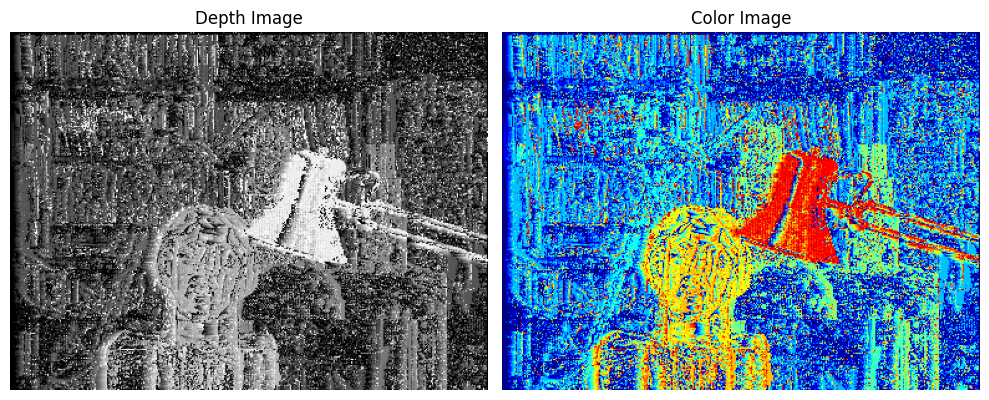

In [12]:
depth, color = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

# Check if depth and color images were generated
if depth is not None and color is not None:
    # Convert BGR to RGB format for Matplotlib (if needed)
    if len(color.shape) == 3:  # Check if color image is in BGR format
        color = cv2.cvtColor(color, cv2.COLOR_BGR2RGB)

    # Create subplots to display depth and color images
    plt.figure(figsize=(10, 5))

    # Display the depth image
    plt.subplot(1, 2, 1)
    plt.imshow(depth, cmap='gray')  # Use grayscale colormap for depth
    plt.title('Depth Image')
    plt.axis('off')  # Hide axes

    # Display the color image
    plt.subplot(1, 2, 2)
    plt.imshow(color)
    plt.title('Color Image')
    plt.axis('off')  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Depth or color image generation failed.")

In [13]:
def pixel_wise_matching_l2(left_img, right_img, disparity_range, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    scale = 16
    max_value = 255 ** 2

    for y in range(height):
        for x in range(width):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = max_value

            for j in range(disparity_range):
                cost = max_value if (x - j) < 0 else l2_distance(int(left[y, x]), int(right[y, x - j]))

                if cost < cost_min:
                    cost_min  = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'pixel_wise_l2.png', depth)
        cv2.imwrite(f'pixel_wise_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

Saving result...
Done.
Depth shape: (288, 384)


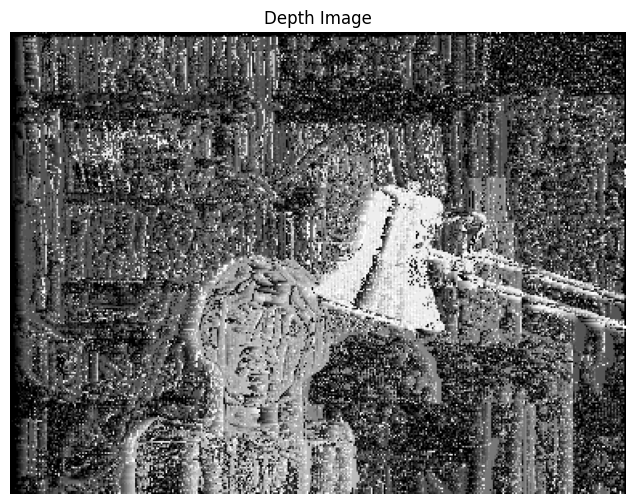

In [19]:
depth = pixel_wise_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)

# If depth is a tuple, extract the first element
if isinstance(depth, tuple):
    depth = depth[0]

# Proceed with visualization
if depth is not None:
    print(f"Depth shape: {depth.shape}")

    plt.figure(figsize=(8, 6))
    plt.imshow(depth, cmap='gray')
    plt.title('Depth Image')
    plt.axis('off')
    plt.show()
else:
    print("Depth image generation failed.")


Saving result...
Done.


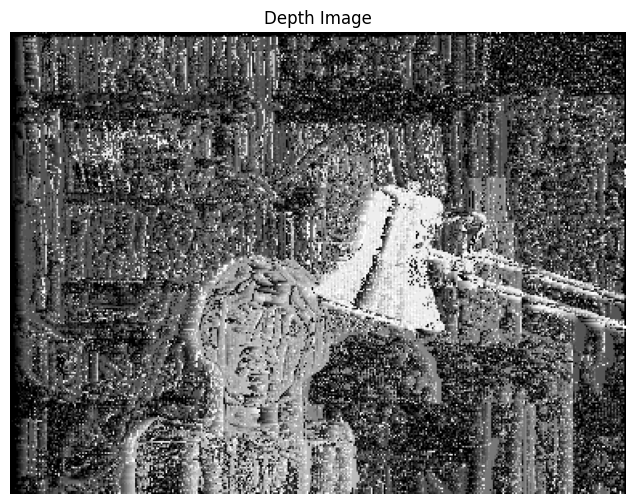

In [16]:
# L2 result
depth = pixel_wise_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    save_result=True
)
# Check if the depth image was generated
if depth is not None:
    # Create a figure to display the depth image
    plt.figure(figsize=(8, 6))
    plt.imshow(depth, cmap='gray')  # Use grayscale colormap for depth
    plt.title('Depth Image')
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Depth image generation failed.")

# Problem 2

In [21]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y) ** 2

In [20]:
def window_based_matching_l1(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_min  = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l1_distance(
                                int(left[y + v, x + u]), int(right[y + v, (x + u) - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'window_based_l1.png', depth)
        cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

In [22]:
def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 ** 2

    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):

            # Find j where cost has minimum value
            disparity = 0
            cost_min  = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l2_distance(int(left[y + v, x + u]),  int(right[y + v, (x + u) - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'window_based_l2.png', depth)
        cv2.imwrite(f'window_based_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

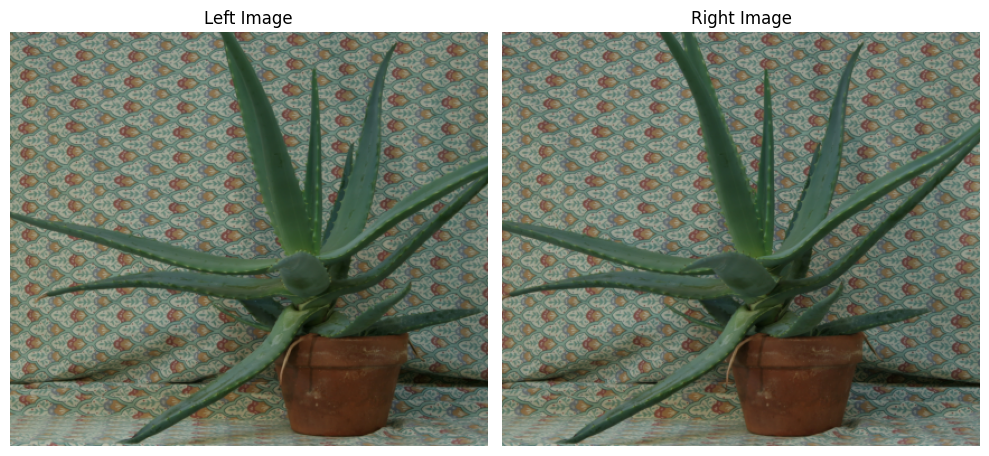

In [24]:
# Paths to the images
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

# Read the images
left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

# Check if images were loaded successfully
if left is None:
    print(f"Failed to load left image from {left_img_path}")
if right is None:
    print(f"Failed to load right image from {right_img_path}")

# Proceed only if images were loaded correctly
if left is not None and right is not None:
    # Convert BGR to RGB format for Matplotlib
    left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

    # Create subplots to display images
    plt.figure(figsize=(10, 5))

    # Display the left image
    plt.subplot(1, 2, 1)
    plt.imshow(left)
    plt.title('Left Image')
    plt.axis('off')  # Hide axes

    # Display the right image
    plt.subplot(1, 2, 2)
    plt.imshow(right)
    plt.title('Right Image')
    plt.axis('off')  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("One or both images failed to load.")

Saving result...
Done.
Depth shape: (370, 427)


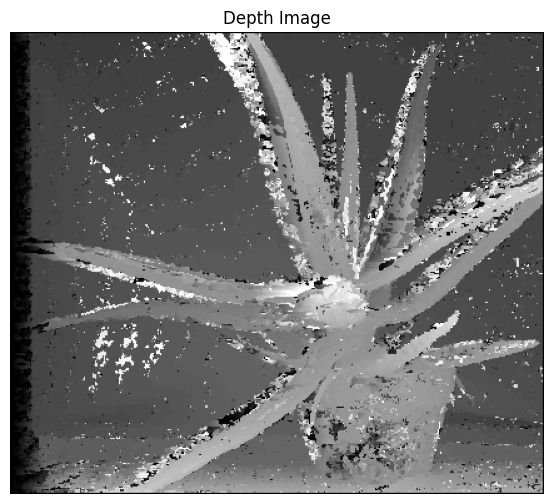

In [25]:
# L1 result
depth = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

# Check if the depth image was generated
if depth is not None:
    # Print the shape of the depth image
    print(f"Depth shape: {depth.shape}")

    # Create a figure to display the depth image
    plt.figure(figsize=(8, 6))
    plt.imshow(depth, cmap='gray')  # Use grayscale colormap for depth
    plt.title('Depth Image')
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Depth image generation failed.")

Saving result...
Done.
Depth shape: (370, 427)


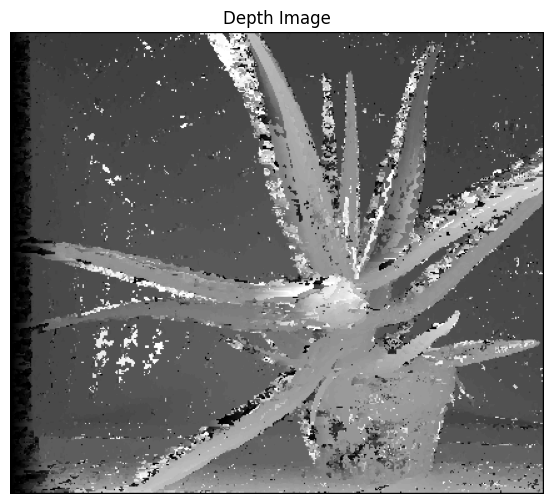

In [26]:
# L2 Result
depth = window_based_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=True
)

# Check if the depth image was generated
if depth is not None:
    # Print the shape of the depth image
    print(f"Depth shape: {depth.shape}")

    # Create a figure to display the depth image
    plt.figure(figsize=(8, 6))
    plt.imshow(depth, cmap='gray')  # Use grayscale colormap for depth
    plt.title('Depth Image')
    plt.axis('off')  # Hide axes
    plt.show()
else:
    print("Depth image generation failed.")

# Problem 3

In [27]:
def l1_distance(x, y):
    return abs(x - y)

def l2_distance(x, y):
    return (x - y) ** 2

In [28]:
def window_based_matching_l1(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height-kernel_half + 1):
        for x in range(kernel_half, width-kernel_half + 1):

            # Find j where cost has minimum value
            disparity = 0
            cost_min  = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half):
                    for u in range(-kernel_half, kernel_half):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l1_distance(int(left[y + v, x + u]),  int(right[y + v, (x + u) - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'window_based_l1.png', depth)
        cv2.imwrite(f'window_based_l1_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

In [29]:
def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 ** 2

    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):

            # Find j where cost has minimum value
            disparity = 0
            cost_min  = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l2_distance(int(left[y + v, x + u]),  int(right[y + v, (x + u) - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite(f'window_based_l2.png', depth)
        cv2.imwrite(f'window_based_l2_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

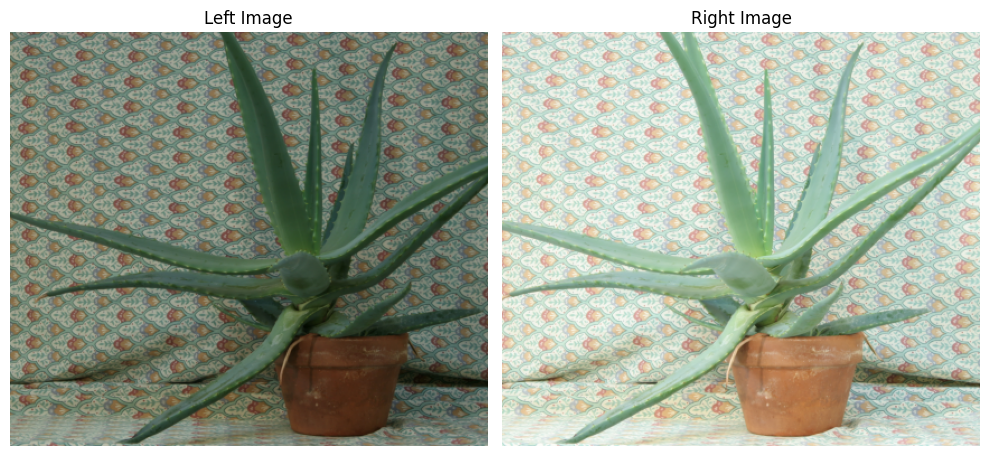

In [30]:
# Paths to the images
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_2.png'
disparity_range = 64
kernel_size = 5

# Read the images
left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

# Check if images were loaded successfully
if left is None:
    print(f"Failed to load left image from {left_img_path}")
if right is None:
    print(f"Failed to load right image from {right_img_path}")

# Proceed only if images were loaded correctly
if left is not None and right is not None:
    # Convert BGR to RGB format for Matplotlib
    left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

    # Create subplots to display images
    plt.figure(figsize=(10, 5))

    # Display the left image
    plt.subplot(1, 2, 1)
    plt.imshow(left)
    plt.title('Left Image')
    plt.axis('off')  # Hide axes

    # Display the right image
    plt.subplot(1, 2, 2)
    plt.imshow(right)
    plt.title('Right Image')
    plt.axis('off')  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("One or both images failed to load.")

Done.
Depth shape: (370, 427)


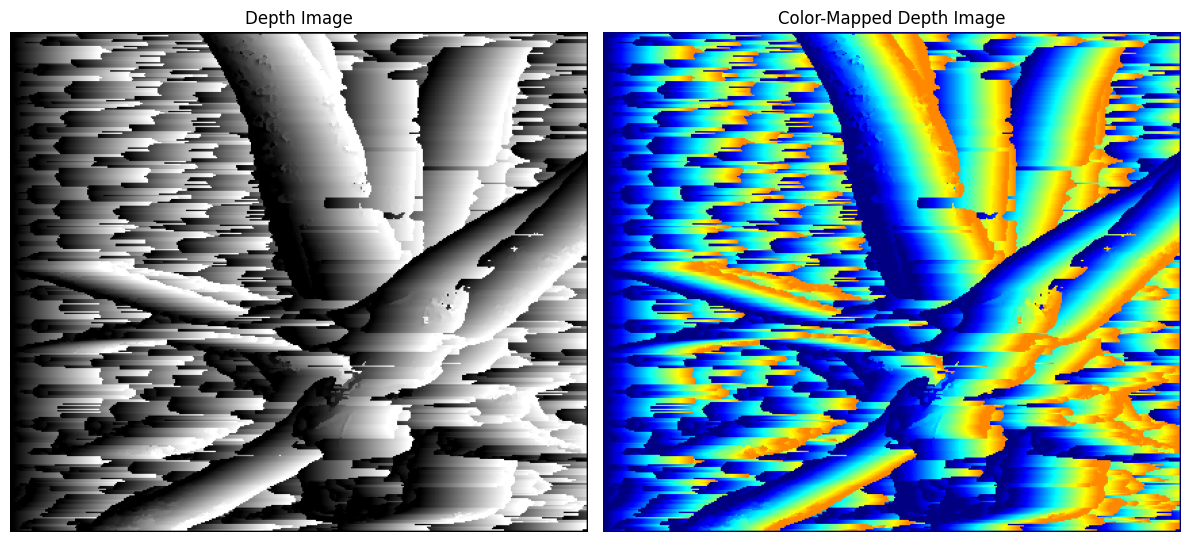

In [31]:
# Compute the depth using window-based matching L1
depth = window_based_matching_l1(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=False
)

# Check if the depth image was generated
if depth is not None:
    # Print the shape of the depth image for debugging
    print(f"Depth shape: {depth.shape}")

    # Create a figure to display the depth image and its color map
    plt.figure(figsize=(12, 6))

    # Display the depth image
    plt.subplot(1, 2, 1)
    plt.imshow(depth, cmap='gray')  # Display depth as grayscale
    plt.title('Depth Image')
    plt.axis('off')  # Hide axes

    # Apply a color map and display the color-mapped depth image
    depth_colormap = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
    depth_colormap = cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.subplot(1, 2, 2)
    plt.imshow(depth_colormap)  # Display the color-mapped depth image
    plt.title('Color-Mapped Depth Image')
    plt.axis('off')  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Depth image generation failed.")

Done.
Depth shape: (370, 427)


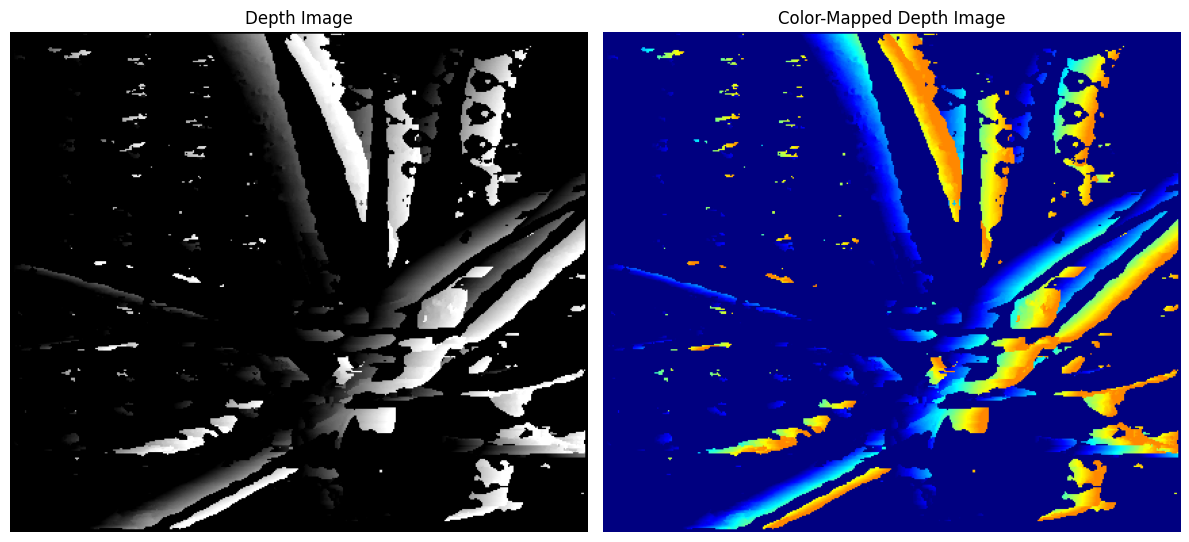

In [32]:
# Compute the depth using window-based matching L2
depth = window_based_matching_l2(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=False
)

# Check if the depth image was generated
if depth is not None:
    # Print the shape of the depth image for debugging
    print(f"Depth shape: {depth.shape}")

    # Create a figure to display the depth image and its color map
    plt.figure(figsize=(12, 6))

    # Display the depth image
    plt.subplot(1, 2, 1)
    plt.imshow(depth, cmap='gray')  # Display depth as grayscale
    plt.title('Depth Image')
    plt.axis('off')  # Hide axes

    # Apply a color map and display the color-mapped depth image
    depth_colormap = cv2.applyColorMap(depth.astype(np.uint8), cv2.COLORMAP_JET)  # Convert to uint8
    depth_colormap = cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.subplot(1, 2, 2)
    plt.imshow(depth_colormap)  # Display the color-mapped depth image
    plt.title('Color-Mapped Depth Image')
    plt.axis('off')  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Depth image generation failed.")

# Problem 4

In [33]:
def cosine_similarity(x, y):
    numerator = np.dot(x, y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)

    return numerator / denominator

In [34]:
def window_based_matching(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    # Read left, right images then convert to grayscale
    left  = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left  = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    # Create blank disparity map
    depth = np.zeros((height, width), np.uint8)
    kernel_half = int((kernel_size - 1) / 2)
    scale = 3

    for y in range(kernel_half, height-kernel_half):
        for x in range(kernel_half, width-kernel_half):
            # Find j where cost has minimum value
            disparity = 0
            cost_optimal  = -1

            for j in range(disparity_range):
                d = x - j
                cost = -1
                if (d - kernel_half) > 0:
                    wp = left[(y-kernel_half):(y+kernel_half)+1, (x-kernel_half):(x+kernel_half)+1]
                    wqd = right[(y-kernel_half):(y+kernel_half)+1, (d-kernel_half):(d+kernel_half)+1]

                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()

                    cost = cosine_similarity(wp_flattened, wqd_flattened)

                if cost > cost_optimal:
                    cost_optimal = cost
                    disparity = j

            # Let depth at (y, x) = j (disparity)
            # Multiply by a scale factor for visualization purpose
            depth[y, x] = disparity * scale

    if save_result == True:
        print('Saving result...')
        # Save results
        cv2.imwrite('window_based_cosine_similarity.png', depth)
        cv2.imwrite('window_based_cosine_similarity_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done.')

    return depth

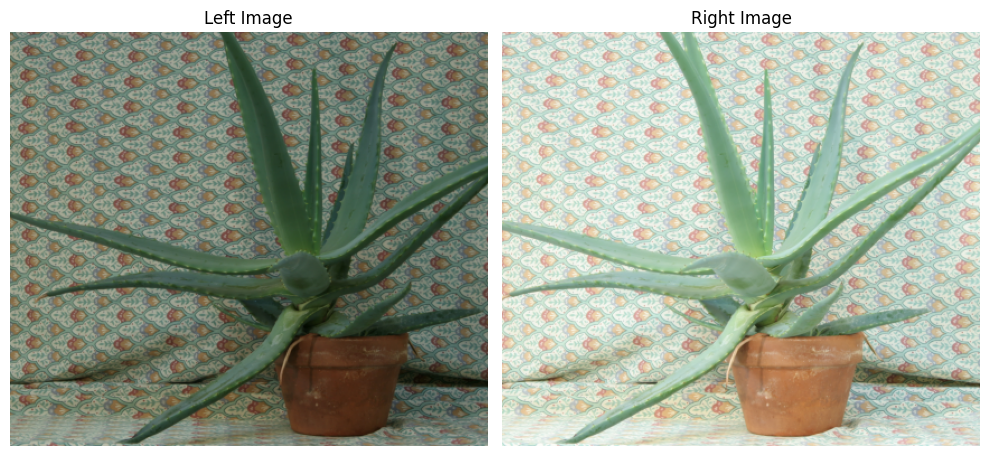

In [35]:
# Paths to the images
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_2.png'
disparity_range = 64
kernel_size = 5

# Read the images
left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

# Proceed only if images were loaded correctly
if left is not None and right is not None:
    # Convert BGR to RGB format for Matplotlib
    left = cv2.cvtColor(left, cv2.COLOR_BGR2RGB)
    right = cv2.cvtColor(right, cv2.COLOR_BGR2RGB)

    # Create subplots to display images
    plt.figure(figsize=(10, 5))

    # Display the left image
    plt.subplot(1, 2, 1)
    plt.imshow(left)
    plt.title('Left Image')
    plt.axis('off')  # Hide axes

    # Display the right image
    plt.subplot(1, 2, 2)
    plt.imshow(right)
    plt.title('Right Image')
    plt.axis('off')  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("One or both images failed to load.")

Done.
Depth shape: (370, 427)


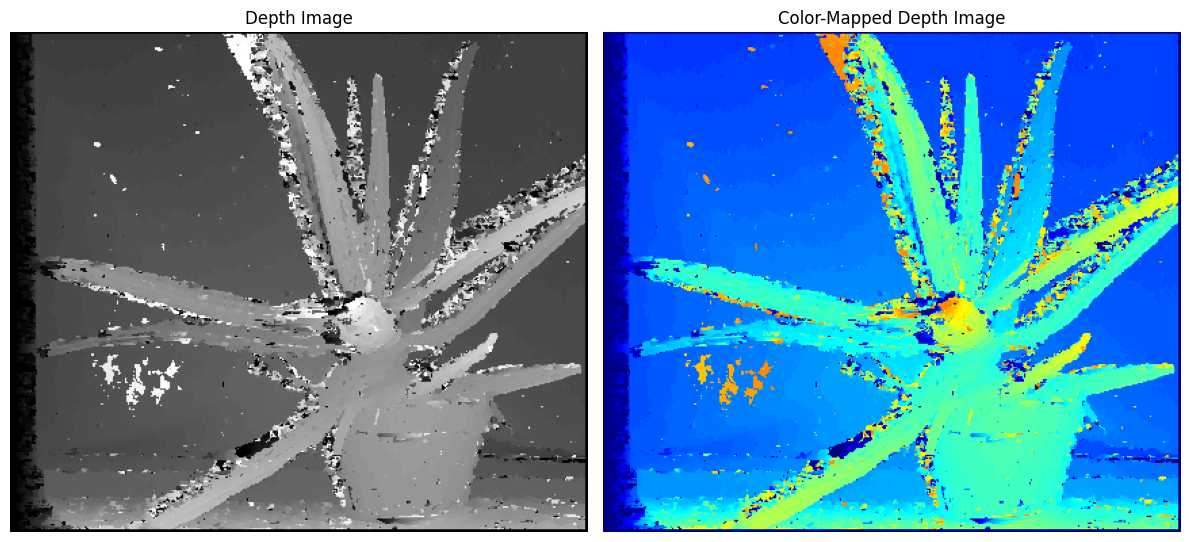

In [36]:
# Compute the depth using window-based matching
depth = window_based_matching(
    left_img_path,
    right_img_path,
    disparity_range,
    kernel_size=kernel_size,
    save_result=False
)

# Check if the depth image was generated
if depth is not None:
    # Print the shape of the depth image for debugging
    print(f"Depth shape: {depth.shape}")

    # Create a figure to display the depth image and its color map
    plt.figure(figsize=(12, 6))

    # Display the depth image
    plt.subplot(1, 2, 1)
    plt.imshow(depth, cmap='gray')  # Display depth as grayscale
    plt.title('Depth Image')
    plt.axis('off')  # Hide axes

    # Apply a color map and display the color-mapped depth image
    depth_colormap = cv2.applyColorMap(depth.astype(np.uint8), cv2.COLORMAP_JET)  # Convert to uint8
    depth_colormap = cv2.cvtColor(depth_colormap, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.subplot(1, 2, 2)
    plt.imshow(depth_colormap)  # Display the color-mapped depth image
    plt.title('Color-Mapped Depth Image')
    plt.axis('off')  # Hide axes

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Depth image generation failed.")